<a href="https://colab.research.google.com/github/mvenouziou/Project-Attention-Is-What-You-Get/blob/main/bms_molecular_translation_AttentionIsWhatYouGet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attention is What You Get

This is my entry into the [Bristol-Myers Squibb Molecular Translation](https://www.kaggle.com/c/bms-molecular-translation)  Kaggle competition.

-----

AUTHOR: 

Mo Venouziou

- *Email: mvenouziou@gmail.com*
- *LinkedIn: www.linkedin.com/in/movenouziou/*

*June 2, 2021*

----



### Our Goal: Predict the "InChI" value of any given chemical compound diagram. 

International Chemical Identifiers ("InChI values") are a standardized encoding to describe chemical compounds. They take the form of a string of letters, numbers and deliminators, often between 100 - 400 characters long. 

The chemical diagrams are provided as PNG files, often of such low quality that it may take a human several seconds to decipher. 

Label length and image quality become a serious challenge here, because we must predict labels for a very large quantity of images. There are 1.6 million images in the test set abd 2.4 million images available in the training set!

In [1]:
"""
# Example (image, target label) pair\n\n'
for val in train_ds.unbatch().take(1):
    print('Example Label:\n', val['InChI'].numpy())
    print('\nCorresponding Image:', plt.imshow(val['image'][:,:,0], cmap='binary'))
### note: load datasets before running this cell
"""

"\n# Example (image, target label) pair\n\n'\nfor val in train_ds.unbatch().take(1):\n    print('Example Label:\n', val['InChI'].numpy())\n    print('\nCorresponding Image:', plt.imshow(val['image'][:,:,0], cmap='binary'))\n### note: load datasets before running this cell\n"

## MODEL STRUCTURE: 

**Image CNN + Attention Features encoder --> text Attention + CNN feature layer decoder.**

This is a hybrid approach with:
 
 - Image Encoder from [*Show, Attend and Tell: Neural Image Caption Generation with Visual Attention*](https://proceedings.mlr.press/v37/xuc15.pdf).  Generate image feature vectors using intermediate layer outputs from a pretrained CNN. (Here I use the more modern EfficientNet model with fixed weights and add a trainable Dense layer for customization.)
 
 - T2T encoder-decoder model from [*All You Need is Attention*](https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf) (Self-attention feature extraction for both encoder and decoder, joint encoder-decoder attention feature interactions, and dense prediction output block. Model includes paramaters to control the number of attention blocks used in encoder and decoder steps.

 - ***PLUS*** *(optional):* Decoder Output Blocks placed in Series (not stacked). Increase the number of trainable paramaters without adding inference computational complexity, while also allowing decoders to specialize on different regions of the output. (Note: Training is a bit trickier. My experiments show it is best to first train with the decoders using shared weights, then allowing them to vary later on in training.)
 
 - ***PLUS*** *(optional):* Is attention really all you need? Add a convolutional layer to enhance text features before decoder self-attention to experiment with performance differences with and without extra convolutional layer(s). Use of CNN's in NLP comes from [*Convolutional Sequence to Sequence Learning*](http://proceedings.mlr.press/v70/gehring17a.html.)

 - ***PLUS*** *(optional):* Beam-Search Alternative, an extra decoding layer applied after the full logits prediction has been made. This takes the form of a bidirectional RNN applied to the full logits sequence. Because a full (initial) prediction has already been made, computations can be paralelized using stateful RNNs. (See more details below.)

*Optional features can be enabled/disabled using parameters in my model definitions.*

----

## NEXT STEPS:

 - Implement **TPU training**. (Currently runs on GPU. Note that a CPU alone is not enough to achieve acceptable inference speed.)

 - experiment with **"Tokens-to-Token ViT"** in place of the image CNN. (Technique from [*Training Vision Transformers from Scratch on ImageNet*](https://arxiv.org/pdf/2101.11986.pdf)
  
 - Train a **Beam-search Alternative**. 

    - Beam search is a technique to modify model predictions to reflect the (local) maximum likelihood estimate. However, it is *very* local in that computation expense increases quickly with the number of character steps taken into account. This is also a hard-coded algorithm, which is somewhat contrary to the philosophy of deep learning.

    - A *Beam-search Alternative* would be an extra decoding layer applied *after* the full logits prediction has been made. This might be in the form of a stateful, bidirectional RNN that is computationally parallizable because it is applied to the full logits sequence.

    - This is coded and ready to train, although I have not yet had the time to do so.

 - Treat the number of convolutional layers (decoder feature extraction) and number of decoders places in series (decoder prediction output) as **new hyperparamaters** to tune.

-------------




### CITATIONS

- "Attention is All You Need." 
 - Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin. NIPS (2017). *https://research.google/pubs/pub46201/*

- "Convolutional Sequence to Sequence Learning."
 
  - Gehring, J., Auli, M., Grangier, D., Yarats, D. & Dauphin, Y.N.. (2017). Convolutional Sequence to Sequence Learning. Proceedings of the 34th International Conference on Machine Learning, in Proceedings of Machine Learning Research 70:1243-1252 Available from *http://proceedings.mlr.press/v70/gehring17a.html.*


-  "Show, Attend and Tell: Neural Image Caption Generation with Visual Attention."
  -  Xu, K., Ba, J., Kiros, R., Cho, K., Courville, A., Salakhudinov, R., Zemel, R. & Bengio, Y.. (2015). Show, Attend and Tell: Neural Image Caption Generation with Visual Attention. Proceedings of the 32nd International Conference on Machine Learning, in Proceedings of Machine Learning Research 37:2048-2057 Available from *http://proceedings.mlr.press/v37/xuc15.html.* 
            

- "Tokens-to-Token ViT: Training Vision Transformers from Scratch on ImageNet"

  - Li Yuan, Yunpeng Chen, Tao Wang, Weihao Yu, Yujun Shi, Zihang Jiang, Francis EH Tay, Jiashi Feng, Shuicheng Yan. Preprint (2021). Available at *https://arxiv.org/abs/2101.11986*.

- Special thanks to [Darien Schettler](https://www.kaggle.com/dschettler8845/bms-efficientnetv2-tpu-e2e-pipeline-in-3hrs/notebook.) for leading readers to the "Show" and "Attention" papers cited above, and sharing his progress at various stages in the competition through public Kaggle notebooks. My work includes a few of his hyperparameter choices and selection of EfficientNet transfer model. I did not read or use his implementations of the papers above.

- It is possible my idea of a Beam Search Alternative is based on a lecture video from DeepLearning.ai's [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning)  on Coursera.

- **Dataset / Kaggle Competition:** "Bristol-Myers Squibb – Molecular Translation" competition on Kaggle (2021). *https://www.kaggle.com/c/bms-molecular-translation*

----


## Contents

1. [Imports](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=TjuUOVXao__C&line=4&uniqifier=1)
2. [Data Pipeline](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=lrLHKs5Ni7Sz)
3. [Model Layers](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=W0T-u0vZamI8)
    - [InChI Encoding](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=DYApmA2lf1hp&line=1&uniqifier=1)
    - [Image Encoding and Self-Attention](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=FESofcGdEaWF&line=1&uniqifier=1)
    - [Decoder Self-Attention](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=6qFDs9RTjvod&line=1&uniqifier=1)
    - [Joint Encoder-Decoder Attention](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=jP-t1MkKnD5L)
    - [Decoder Head (Prediction Output)](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=38GA7wtNEhqW&line=1&uniqifier=1)
    - [Update Mechanism](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=_2UR1DLljD0S&line=1&uniqifier=1)
4. [Full Model](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=D6GIs3f3rpu0&line=1&uniqifier=1)
5. [Training](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=otxdN02mf1ht&line=1&uniqifier=1)
6. [Inference](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=Sbvzr5rdmjgs&line=5&uniqifier=1)

---

In [2]:
#### PACKAGE IMPORTS ####

# TF Model design
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.data import TFRecordDataset
from tensorflow.data.experimental import TFRecordWriter

# Text processing
import re
import string

# Kaggle (for TPU)
#from kaggle_datasets import KaggleDatasets

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
!pip install -U tensorboard_plugin_profile
%load_ext tensorboard

"""
# Debugger
tf.debugging.experimental.enable_dump_debug_info('./logs/', tensor_debug_mode="FULL_HEALTH", 
                                                 circular_buffer_size=-1)
"""

# data management
import numpy as np
import pandas as pd
import itertools

# file management
import os

Requirement already up-to-date: tensorboard_plugin_profile in /usr/local/lib/python3.7/dist-packages (2.4.0)


## Model parameters

The 'ModelParameters' class manages global hyperparamaters for portability between Colab and Kaggle notebook environments. Once set, all other cells will run on either platform.

On Colab, connection to my personal Google Drive is required, as ModelParameters will extract the dataset from a zip file to the hosted environment. This process may take several minutes. (It would not be difficult for the reader to update the code to point to their own drive and download the zip dataset using the Kaggle API code below.)

In [3]:
""" Kaggle api for download the compressed dataset from Kaggle's servers.

# imports
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

# if needed, download data using '!kaggle competitions download -c bms-molecular-translation'
# then unzip with '! unzip bms-molecular-translation.zip -d datasets'
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'  # api token location
"""

" Kaggle api for download the compressed dataset from Kaggle's servers.\n\n# imports\n!pip uninstall -y kaggle\n!pip install --upgrade pip\n!pip install kaggle==1.5.6\n\n# if needed, download data using '!kaggle competitions download -c bms-molecular-translation'\n# then unzip with '! unzip bms-molecular-translation.zip -d datasets'\nos.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'  # api token location\n"

In [4]:
# check for TPU & initialize
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
    tf.config.experimental_connect_to_cluster(resolver)

    tf.tpu.experimental.initialize_tpu_system(resolver)
    print("All devices: ", tf.config.list_logical_devices('TPU'))

    STRATEGY = tf.distribute.TPUStrategy(resolver)
    TPU = True
    os.environ["TFHUB_MODEL_LOAD_FORMAT"] = "UNCOMPRESSED"  # for TF Hub models on TPU

    # set mixed precision type
    PRECISION_TYPE = 'mixed_bfloat16'

    # extra imports for GCS
    !pip install -q fsspec
    !pip install -q gcsfs
    import fsspec, gcsfs 

except ValueError:
    TPU = False
    STRATEGY = tf.distribute.get_strategy()
    PRECISION_TYPE = 'mixed_float16'

# set mixed precision policy
tf.keras.mixed_precision.set_global_policy(PRECISION_TYPE)

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla P100-PCIE-16GB, compute capability 6.0
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [5]:
class ModelParameters:
    def __init__(self, cloud_server='kaggle'):
               
        # universal parameters
        self._batch_size = 16  # note: increased below on TPU
        self._inference_batch_size = 256
        self._padded_length = 200
        self._image_size = (320, 320)  # shape to process images in data pipeline, matches HUB model
        self.SOS_string = 'InChI=1S/'  # start of sentence value
        self.EOS_string = '<EOS>'  # end of sentence value
        self._strategy = STRATEGY
        self._precision_type = PRECISION_TYPE
        self._tpu = TPU

        # File Paths       
        if cloud_server == 'colab':  # Google Colab
            
            if self._tpu:
                self._batch_size = 16 * self._strategy.num_replicas_in_sync

                # TPU file structure (via Kaggle GCS folder)
                self._dataset_dir = 'gs://kds-081663de130be3ab70a31d8099e476f26c1e39c7fad148fa904bb6e3' # from Kaggle. Get updated directory on Kaggle via KaggleDatasets().get_gcs_path('bms-molecular-translation')
                self._prepared_files_dir = 'gs://kds-1c4d8f964095d35319af0fa89901679f61fbb70015e6ae53d80b614d'  # from Kaggle. Get updated directory on Kaggle via KaggleDatasets().get_gcs_path('periodic-table')
                self._tfrec_dir = 'gs://kds-452fce33df15e88f971a264d53595c6ed86dc34bba28e9cdcaf4cb2a'  # from Kaggle. Get updated directory on Kaggle via KaggleDatasets().get_gcs_path('bmsshards')
                self._checkpoint_dir = '/content/gdrive/MyDrive/Colab_Notebooks/models/MolecularTranslation/'  # gdrive
                self._load_checkpoint_dir = './'
                self._csv_save_dir = './'

            else:

                # load drive
                from google.colab import drive
                drive.mount('/content/gdrive/') 

                # unzip data
                if not os.path.isdir('/content/bms-molecular-translation'):
                    !unzip -q /content/gdrive/MyDrive/Colab_Notebooks/models/MolecularTranslation/bms-molecular-translation.zip -d '/content/bms-molecular-translation'
                
                # file paths
                self._dataset_dir = 'bms-molecular-translation/'
                self._prepared_files_dir = '/content/gdrive/MyDrive/Colab_Notebooks/models/MolecularTranslation/'
                self._checkpoint_dir = '/content/gdrive/MyDrive/Colab_Notebooks/models/MolecularTranslation/checkpoints/'
                self._load_checkpoint_dir = self._checkpoint_dir
                self._csv_save_dir = self._prepared_files_dir 
                self._tfrec_dir = None
                
        elif cloud_server == 'kaggle': # Kaggle cloud notebook (CPU / GPU)
            from kaggle_datasets import KaggleDatasets
            
            # check for TPU 
            if self._tpu: 
                
                self._batch_size = 8 * self._batch_size
                
                # file paths
                self._dataset_dir = KaggleDatasets().get_gcs_path('bms-molecular-translation')
                self._prepared_files_dir = KaggleDatasets().get_gcs_path('periodic-table')
                self._tfrec_dir = KaggleDatasets().get_gcs_path('bmsshards')
                self._checkpoint_dir = './'
                self._load_checkpoint_dir = './'
                self._csv_save_dir = './'

            # set GPU instance info
            else:  

                # file paths
                self._dataset_dir = '../input/bms-molecular-translation/'
                self._prepared_files_dir = '../input/periodic-table/'
                self._tfrec_dir = '../input/bmsshards/'
                self._checkpoint_dir = './'
                self._load_checkpoint_dir = '../input/k/mvenou/bms-molecular-translation/checkpoints/'
                self._csv_save_dir = './'
                self._tfrec_dir = None

        # common file paths
        self._periodic_table_csv = os.path.join(self._prepared_files_dir, 'periodic_table_elements.csv')
        self._vocab_csv = os.path.join(self._prepared_files_dir, 'vocab.csv')        
        self._test_images_dir = os.path.join(self._dataset_dir, 'test/')
        self._train_images_dir = os.path.join(self._dataset_dir, 'train/')
        self._extra_labels_csv = os.path.join(self._dataset_dir, 'extra_approved_InChIs.csv')
        self._train_labels_csv = os.path.join(self._dataset_dir, 'train_labels.csv')
        self._sample_submission_csv = os.path.join(self._dataset_dir, 'sample_submission.csv')
        
    # functions to access params
    def padded_length(self):
        return self._padded_length
    def mixed_precision(self):
        return self._precision_type
    def tpu(self):
        return self._tpu
    def tfrec_dir(self):
        return self._tfrec_dir
    def cloud_server(self):
        return self._cloud_server
    def strategy(self):
        return self._strategy
    def csv_save_dir(self):
        return self._csv_save_dir
    def train_labels_csv(self):
        return self._train_labels_csv
    def vocab_csv(self):
        return self._vocab_csv
    def periodic_table_csv(self):
        return self._periodic_table_csv
    def batch_size(self):
        return self._batch_size  
    def inference_batch_size(self):
        return self._inference_batch_size
    def image_size(self):
        return self._image_size    
    def SOS(self):
        return self.SOS_string
    def EOS(self):
        return self.EOS_string
    def train_images_dir(self):
        return self._train_images_dir
    def test_images_dir(self):
        return self._test_images_dir   
    def checkpoint_dir(self):
        return self._checkpoint_dir
    def load_checkpoint_dir(self):
        return self._load_checkpoint_dir


Initialize Parameter Options

In [6]:
PARAMETERS = ModelParameters(cloud_server='colab')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# **Input Pipeline**

Load train labels as DataFrame

In [7]:
# Load CSV as dataframe
train_labels_df = pd.read_csv(PARAMETERS.train_labels_csv())
train_labels_df.head()

,image_id,InChI
0,000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...
1,000019cc0cd2,InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...
2,0000252b6d2b,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...
3,000026b49b7e,InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-...
4,000026fc6c36,InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7...


### InChI Text Parsing

We split each InChI label into its "vocabulary" of logical subunits, consisting of element abbreviations numbers, common symbols and the required string 'InChI=1S/', which is at the start of every InChI label. We want to narrow down this vocabulary to the smallest set represented in our training data. The functions below provide a system for finding this minimal set, as well as preparing a new CSV file with parsed labels ready to be fed into a tokenizer layer.

(For clarity and to reduce reliance on loading external files, the true code has been commented out and replaced with corresponding hard-coded values.)

In [8]:
def inchi_parsing_regex(parameters=PARAMETERS):
    # regex for spliting on InChi, but preserving chemical element abbreviations and three-digit numbers
    
    # shortcut: hard coded values
    vocab = [parameters.EOS(), parameters.SOS(), '(',
            ')', '+', ',', '-', '/', 'Br', 'B', 'Cl', 'C', 'D', 'F',
            'H', 'I', 'N', 'O', 'P', 'Si', 'S', 'T', 'b', 'c', 'h', 'i',
            'm', 's', 't']
        
    vocab += [str(num) for num in reversed(range(168))]
    vocab = [re.escape(val) for val in vocab]
       
    """ # to create vocab from scratch, use:
    SOS = parameters.SOS()
    EOS = parameters.EOS()
    
    # load list of elements we should search for within InChI strings: 
    periodic_elements = pd.read_csv(PARAMETERS.periodic_table_csv(), header=None)[1].to_list()
    periodic_elements = periodic_elements + [val.lower() for val in periodic_elements] + [val.upper() for val in periodic_elements]
    
    punctuation = list(string.punctuation)
    punctuation = [re.escape(val) for val in punctuation]   # update values with regex escape chars added as needed

    three_dig_nums_list = [str(i) for i in range(1000, -1, -1)]

    vocab = [SOS, EOS] + periodic_elements + three_dig_nums_list + punctuation
    """

    split_elements_regex = rf"({'|'.join(vocab)})"
    
    return split_elements_regex

In [9]:
INCHI_PARSING_REGEX = inchi_parsing_regex()

def parse_InChI(texts, parsing_regex=INCHI_PARSING_REGEX):  
    return ' '.join(re.findall(parsing_regex, texts))


# TF dataset map-compatible version
def parse_InChI_py_fn(texts, parsing_regex=INCHI_PARSING_REGEX):
    def tf_parse_InChI(texts):  
        texts = np.char.array(texts.numpy())
        texts = np.char.decode(texts).tolist()
        texts = tf.constant([parse_InChI(val) for val in texts])
        return tf.squeeze(texts)
    return tf.py_function(func=tf_parse_InChI, inp=[texts], Tout=tf.string)


# extracts filepath from image name
def path_from_image_id(x, root_folder):
    folder_a = tf.strings.substr(x, pos=0, len=1)
    folder_b = tf.strings.substr(x, pos=1, len=1)
    folder_c = tf.strings.substr(x, pos=2, len=1)
    filename =  tf.strings.join([x, '.png'])
    return tf.strings.join([root_folder, folder_a, folder_b, folder_c, filename], separator='/')

Tokenizer

Note: This must be kept outside the model (and used in dataset prep) for TPU compatability

In [10]:
def Tokenizer(parameters):
    """ note: crops /pads to max len
    """

    SOS = parameters.SOS()
    EOS = parameters.EOS()
    padded_length = PARAMETERS.padded_length()
    
    # Create vocabulary for tokenizer
    def create_vocab():       
        hard_coded_vocab = [PARAMETERS.EOS(), PARAMETERS.SOS(), '(',
            ')', '+', ',', '-', '/', 'B', 'Br',  'C', 'Cl', 'D', 'F',
            'H', 'I', 'N', 'O', 'P', 'S', 'Si', 'T', 'b', 'c', 'h', 'i',
            'm', 's', 't']
        
        numbers = [str(num) for num in range(168)]
        
        vocab = hard_coded_vocab + numbers
        
        """
        # get from saved file
        vocab = pd.read_csv(PARAMETERS.vocab_csv())['vocab_value'].to_list()   
        vocab = list(vocab)
        """

        """ 
        # To create from scratch, extract all vocab elements appearing in train set:
        df = pd.read_csv(PARAMETERS.train_labels_csv())  
        seg_len = 250000
        num_breaks = len(df) // seg_len

        vocab = set()
        for i in range(num_breaks):

            df_i =  df['InChI'].iloc[seg_len * i: seg_len * (i+1)]
            texts =  df_i.apply(lambda x: set(parse_InChI(x).split()))
            texts = texts.tolist()

            vocab = vocab.union(*texts)

            print(f'completed {i} / {num_breaks}')

        vocab = list(vocab)
        vocab_df = pd.DataFrame({'vocab_value': vocab})

        # save results
        filename = os.path.join(PARAMETERS.csv_save_dir(), 'vocab.csv')
        vocab_df.to_csv(filename, index=False)
        """
               
        return vocab

    vocab = create_vocab()
    
    # create tokenizer
    tokenizer_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
        standardize=None, split=lambda x: tf.strings.split(x, sep=' ', maxsplit=-1), 
        output_mode='int', output_sequence_length=padded_length, vocabulary=vocab)

    # record EOS token
    tokenized_EOS = tokenizer_layer(tf.constant([EOS]))
    
    # create inverse (de-tokenizer)
    inverse_tokenizer = tf.keras.layers.experimental.preprocessing.StringLookup(
        vocabulary=tokenizer_layer.get_vocabulary(), invert=True)

    return tokenizer_layer, inverse_tokenizer, tokenized_EOS

In [11]:
TOKENIZER_LAYER, INVERSE_TOKENIZER, TOKENIZED_EOS = \
    Tokenizer(parameters=PARAMETERS)

def tokenize_text(w, x, y, z):
    # note: requires batch dim
    y = TOKENIZER_LAYER(y)
    return w, x, y, z

Image Loader

In [12]:
# Image loaders
def load_image(image_path):
    image_path = tf.squeeze(image_path)
    image = keras.layers.Lambda(lambda x: tf.io.read_file(x))(image_path)
    return image   

def decode_image(image, target_size):
    image = keras.layers.Lambda(lambda x: tf.io.decode_image(x, channels=1, expand_animations=False))(image)
    image = keras.layers.experimental.preprocessing.Resizing(*target_size)(image)
    return image    

## Datasets

Here we create efficient tf.data.Dataset train / validation / test sets.

Out data pipeline will read our prepared CSV of (image filename, parsed InChI and standard InChI) tuples. (If this file is not found, it will be created from scratch. This may take several minutes)  Iterating through the list, it will load batches of corresponding images and labels.

Our datasets contain the following information, accessible by dict keys: images, image_id, InChI, parsed_InChI. (The test set uses InChI = parsed_InChI = 'InChI=1S/', the known required stating value for any InChI code.)

In [13]:
def data_generator(image_set, parameters=PARAMETERS, labels_df=None, decode_images=True):
       
    # get global params
    batch_size = parameters.batch_size()
    inference_batch_size = parameters.inference_batch_size()
    target_size = parameters.image_size()
    SOS = parameters.SOS()
    EOS = parameters.EOS()
    
    # dataset options
    prefetch_size = tf.data.AUTOTUNE 
    inference_prefetch_size = tf.data.AUTOTUNE    
    options = tf.data.Options()
    options.experimental_optimization.autotune_buffers = True
    options.experimental_optimization.map_vectorization.enabled = True
    options.experimental_deterministic = False
    options.experimental_slack = True
        
    # Train & Validation Datasets
    if image_set in ['train', 'valid']:
        root_folder = parameters.train_images_dir()  # train / valid images
        valid_split = 0.10
        
        # load labels into memory as dataframe
        if labels_df is None:
            labels_df = pd.read_csv(parameters.train_labels_csv())

        # test / train split
        num_valid_samples = int(valid_split * len(labels_df))
        train_df = labels_df.iloc[num_valid_samples: ]  # get train split
        valid_df = labels_df.iloc[: num_valid_samples]  # get validation split

        # shuffle
        train_df = train_df.sample(frac=1)
        valid_df = valid_df.sample(frac=1)

        # load into datasets  # (image_id, InChI)
        train_ds = tf.data.Dataset.from_tensor_slices(train_df.values)
        valid_ds = tf.data.Dataset.from_tensor_slices(valid_df.values)

        train_ds = train_ds.with_options(options)
        valid_ds = valid_ds.with_options(options)

        # update image paths  
        def map_path(x):  # (image_path, image_id, InChI)
            image_id = x[0]
            image_path = path_from_image_id(image_id, root_folder)
            return image_path, x[0], x[1]

        train_ds = train_ds.map(map_path, num_parallel_calls=tf.data.AUTOTUNE)
        valid_ds = valid_ds.map(map_path, num_parallel_calls=tf.data.AUTOTUNE)

        def map_parse(x, y, z):  # (image_path, image_id, InChI)
            parsed_InChI = parse_InChI_py_fn(z)
            return x, y, parsed_InChI, z
   
        train_ds = train_ds.map(map_parse, num_parallel_calls=tf.data.AUTOTUNE)
        valid_ds = valid_ds.map(map_parse, num_parallel_calls=tf.data.AUTOTUNE)
                
        # load images into dataset       
        def open_images(w, x, y, z):
            w = load_image(w)
            return w, x, y, z
        
        train_ds = train_ds.map(open_images, num_parallel_calls=tf.data.AUTOTUNE)
        valid_ds = valid_ds.map(open_images, num_parallel_calls=tf.data.AUTOTUNE)    

        # PREFETCH dataset BEFORE decoding images
        train_ds = train_ds.prefetch(prefetch_size)
        valid_ds = valid_ds.prefetch(prefetch_size)

        def decode(w, x, y, z):
            w = decode_image(w, target_size)
            return w, x, y, z

        if decode_images:
            train_ds = train_ds.map(decode, num_parallel_calls=tf.data.AUTOTUNE)
            valid_ds = valid_ds.map(decode, num_parallel_calls=tf.data.AUTOTUNE)    

        # BATCH dataset AFTER decoding images (required by tf.io)
        # should batch before other pure TF Lambda layer ops
        train_ds = train_ds.batch(batch_size, drop_remainder=True,
                        num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)
        valid_ds = valid_ds.batch(batch_size, drop_remainder=True,
                        num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)
        
        # add extra "EOS" values to end of parsed inchi
        def extend_EOS(w, x, y, z):
            y = tf.strings.join([y, EOS, EOS, EOS, EOS, EOS], separator=' ')
            y = tf.reshape(y, [-1])
            return w, x, y, z

        train_ds = train_ds.map(extend_EOS, num_parallel_calls=tf.data.AUTOTUNE)
        valid_ds = valid_ds.map(extend_EOS, num_parallel_calls=tf.data.AUTOTUNE)

        # Tokenize parsed_inchi.  Note: ds must be batched before this step (size=1 is ok) 
        train_ds = train_ds.map(tokenize_text, num_parallel_calls=tf.data.AUTOTUNE)
        valid_ds = valid_ds.map(tokenize_text, num_parallel_calls=tf.data.AUTOTUNE)

        # name the elements
        def map_names(w, x, y, z):
            return  {'image': w, 'image_id': x, 'tokenized_InChI': y, 'InChI': z}
        
        train_ds = train_ds.map(map_names, num_parallel_calls=tf.data.AUTOTUNE)
        valid_ds = valid_ds.map(map_names, num_parallel_calls=tf.data.AUTOTUNE)
        
        return train_ds, valid_ds
    
    # Test Dataset
    elif image_set == 'test':

        # note: image resizing and batching done during this loading step
        # other elements must be batched before combining
        image_ds = tf.keras.preprocessing.image_dataset_from_directory(
            directory=parameters.test_images_dir(), labels='inferred', label_mode=None,
            class_names=None, color_mode='grayscale', batch_size=inference_batch_size, 
            image_size=target_size, shuffle=False, seed=None, validation_split=None, 
            subset=None, follow_links=False)

        if not decode_images:  
            # convert image to raw byte string
            image_ds = image_ds.unbatch()
            image_ds = image_ds.map(lambda image: tf.io.encode_png(image))
            image_ds = image_ds.batch(inference_batch_size)

        # set filenames as label and batch
        image_id_ds = tf.data.Dataset.from_tensor_slices(image_ds.file_paths)
        image_id_ds = image_id_ds.map(lambda x: tf.strings.split(x, os.path.sep)[-1],
                                      num_parallel_calls=tf.data.AUTOTUNE)
        image_id_ds = image_id_ds.batch(inference_batch_size, num_parallel_calls=tf.data.AUTOTUNE)
                
        # set InChI label as start value 'InChI=1S/' and batch
        inchi_ds = image_id_ds.map(lambda x: tf.constant(SOS, dtype=tf.string),
                                   num_parallel_calls=tf.data.AUTOTUNE)
        inchi_ds = inchi_ds.batch(inference_batch_size, num_parallel_calls=tf.data.AUTOTUNE)
        
        # merge datasets
        test_ds = tf.data.Dataset.zip((image_ds, image_id_ds, inchi_ds, inchi_ds))

        # prefetch images AFTER data 'test_ds.file_paths'
        test_ds = test_ds.prefetch(inference_prefetch_size)

        # Tokenize parsed_inchi.  Note: ds must be batched before this step (size=1 is ok) 
        test_ds = test_ds.map(tokenize_text, num_parallel_calls=tf.data.AUTOTUNE)
        
        # set key names
        test_ds = test_ds.map(lambda w, x, y, z: {'image': w, 
                                                  'image_id': x, 
                                                  'tokenized_InChI': y,
                                                  'InChI': z},
                              num_parallel_calls=tf.data.AUTOTUNE)
        
        return test_ds

Create Test, Train and Validation Datasets

In [14]:
if not PARAMETERS.tpu():
    train_ds, valid_ds = data_generator('train', parameters=PARAMETERS, labels_df=train_labels_df, decode_images=True)
    #test_ds = data_generator('test', parameters=PARAMETERS, labels_df=None, decode_images=True)

Examine data shapes

In [15]:
if not PARAMETERS.tpu():

    print('Train DS')
    for val in train_ds.take(1):    
        print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
              'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)

    print('\nValidation DS')
    for val in valid_ds.take(1):
        print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
              'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)

    try:
        print('\nTest DS')
        for val in test_ds.take(1):
            print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
                'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)
    except:
        pass

Train DS
image: (16, 320, 320, 1) image_id: (16,) InChI: (16,) tokenized_InChI: (16, 200)

Validation DS
image: (16, 320, 320, 1) image_id: (16,) InChI: (16,) tokenized_InChI: (16, 200)

Test DS


### TF Records Implementation

In [16]:
# Create TF Examples
def make_example(image, image_id, tokenized_InChI, InChI):
    image_feature = tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[image.numpy()])  # image provided as raw bytestring
    )
    image_id_feature = tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[image_id.numpy()])
    )
    tokenized_InChI_feature = tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.serialize_tensor(tokenized_InChI).numpy()])
    )
    InChI_feature = tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[InChI.numpy()])
    )

    features = tf.train.Features(feature={
        'image': image_feature,
        'image_id': image_id_feature,
        'tokenized_InChI': tokenized_InChI_feature,
        'InChI': InChI_feature
    })
    
    example = tf.train.Example(features=features)

    return example.SerializeToString()


def make_example_py_fn(image, image_id, InChI, tokenized_InChI):
    return tf.py_function(func=make_example, 
                   inp=[image, image_id, InChI, tokenized_InChI], 
                   Tout=tf.string)


# Decode TF Examples
def decode_example(example, parameters=PARAMETERS):        
    feature_description = {'image': tf.io.FixedLenFeature([], tf.string),
                           'image_id': tf.io.FixedLenFeature([], tf.string),
                           'tokenized_InChI': tf.io.FixedLenFeature([], tf.string),
                           'InChI': tf.io.FixedLenFeature([], tf.string)}
    
    values = tf.io.parse_single_example(example, feature_description)
    
    
    values['image'] = decode_image(values['image'], parameters.image_size())
    values['tokenized_InChI'] = tf.io.parse_tensor(values['tokenized_InChI'],
                                                  out_type=tf.int64)
    values['tokenized_InChI'] = tf.cast(values['tokenized_InChI'], tf.int32)
    
    return values

In [17]:
def serialized_dataset_gen(parameters=PARAMETERS, labels_df=train_labels_df):
    
    train_ds, valid_ds = data_generator(image_set='train', 
                                        parameters=parameters, 
                                        labels_df=train_labels_df, 
                                        decode_images=False)  # make sure not to decode images    
    
    train_ds = train_ds.unbatch()
    valid_ds = valid_ds.unbatch()
    
    # Create TF Examples
    train_ds = train_ds.map(lambda x: make_example_py_fn(x['image'], x['image_id'], x['tokenized_InChI'], x['InChI']), 
                            num_parallel_calls=tf.data.AUTOTUNE)
    valid_ds = valid_ds.map(lambda x: make_example_py_fn(x['image'], x['image_id'], x['tokenized_InChI'], x['InChI']), 
                            num_parallel_calls=tf.data.AUTOTUNE)
    
    return train_ds, valid_ds


In [18]:
# Create TF Record Shards
def create_records(dataset, subset, num_shards):
    
    folder = subset + '_tfrec'
    
    if subset =='train':
        num_samples = int(.9 * len(train_labels_df))    # test / valid split
    elif subset == 'valid':
        num_samples = int(.1 * len(train_labels_df))
    else:
        num_samples = 2000000

    if not os.path.isdir(folder):
        os.mkdir(folder)
        
    for shard_num in range(num_shards):
        
        filename = os.path.join(folder, f'{subset}_shard_{shard_num+1}')
        try:
            this_shard = dataset.skip(shard_num * num_samples//num_shards).take(num_samples//num_shards)
        
            print(f'Writing shard {shard_num+1}/{num_shards} to {filename}')
            writer = tf.data.experimental.TFRecordWriter(filename)
            writer.write(this_shard)
        except:
            break
    
    return None 
    
# Load dataset from saved TF Record Shards
def dataset_from_records(subset, parameters=PARAMETERS):

    # options
    options = tf.data.Options()
    options.experimental_deterministic = False
    options.experimental_slack = True

    # get TF Records
    filepath = os.path.join(parameters.tfrec_dir(), 
                            subset + '_tfrec/*')
    filenames = tf.io.gfile.glob(filepath)

    # create dataset from records
    dataset = tf.data.TFRecordDataset(filenames,
                            num_parallel_reads=tf.data.experimental.AUTOTUNE)  
    dataset = dataset.with_options(options)
 
    """
    # merge the files
    num_readers = parameters.strategy().num_replicas_in_sync
    dataset = dataset.interleave(tf.data.TFRecordDataset,  
                                 cycle_length=num_readers, block_length=1)
    """
    # decode examples
    dataset = dataset.map(decode_example, num_parallel_calls=tf.data.AUTOTUNE)

    # coerce unknown shape
    dataset = dataset.map(lambda x: {'image':x['image'],
                                     'image_id': x['image_id'],
                                     'tokenized_InChI': tf.reshape(x['tokenized_InChI'], [-1]),
                                     'InChI': x['InChI']},
                          num_parallel_calls=tf.data.AUTOTUNE)  

    dataset = dataset.batch(parameters.batch_size())
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
        
    return dataset

In [19]:
# To create TF_Records files
# note: can take 8+ hours for train set alone!
"""
create_records(serial_valid_ds, subset='valid', num_shards=8)
create_records(serial_train_ds, subset='train', num_shards=80)
#create_records(test_ds, subset='test', num_shards=80)
"""

"\ncreate_records(serial_valid_ds, subset='valid', num_shards=8)\ncreate_records(serial_train_ds, subset='train', num_shards=80)\n#create_records(test_ds, subset='test', num_shards=80)\n"

In [20]:
# IF USING TF_RECORDS:
if PARAMETERS.tpu():
    with PARAMETERS.strategy().scope(): 
        train_ds = dataset_from_records('train', parameters=PARAMETERS)
        valid_ds = dataset_from_records('valid', parameters=PARAMETERS)

    print('Train DS')
    for val in train_ds.take(1):    
        print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
              'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)

    print('\nValidation DS')
    for val in valid_ds.take(1):
        print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
              'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)

    try:
        print('\nTest DS')
        for val in test_ds.take(1):
            print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
                'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)
    except:
        pass

# **Model Layers**

## InChI Encoding

Tokenizer and Embedding to convert parsed InChI strings to tensors of numbers

InChI Input Prep Layer

In [21]:
def InchiPrep(padded_length, max_len, name='InchiPrep'):
    """ separates tokenized InChI into input / target pair """
        
    # inputs
    tokenized_inchi = keras.layers.Input([padded_length], dtype=tf.int32, name='tokenized_inchi')
    inputs = [tokenized_inchi]

    # crop to max length
    tokenized_inchi = tokenized_inchi[:, :max_len]
    
    # split into input / target pairs
    inchi_target = tokenized_inchi
    
    # inputs
    inchi_input = keras.layers.Lambda(lambda x: x[:, :-1])(tokenized_inchi)
    
    # outpus
    outputs = [inchi_input, inchi_target]
    
    return keras.Model(inputs, outputs, name=name)

In [22]:
temp_prep = InchiPrep(padded_length=TOKENIZER_LAYER.get_config()['output_sequence_length'],
                      max_len=177)
temp_prep.summary()

Model: "InchiPrep"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tokenized_inchi (InputLayer) [(None, 200)]             0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 177)               0         
_________________________________________________________________
lambda (Lambda)              (None, 176)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


# Image Encoder

Feature Extraction Step 1: Run the images through a pre-trained image network, extracting features as the output of an intermediate convolutional layer. [Technique from "Show, Attend and Tell: Neural Image Caption Generation with Visual Attention," cited at the top of this notebook.]  A dense layer is added for transfer learning and to control the dimension of the attention mechanism used later.

Transfer Model

In [23]:
# NOTE: Hub model doesn't work with mixed precision. Temporarily disable while loading.
tf.keras.mixed_precision.set_global_policy('float32')  # removed mixed precision

# NOTE: local loading required (for TPU)
load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')

# NOTE: must load model within distribution strategy with load options (for TPU)
with PARAMETERS.strategy().scope():  # ("distribution strategy" defined at top of notebook)
    PRETRAINED_MODEL = hub.KerasLayer("https://tfhub.dev/tensorflow/efficientdet/lite0/feature-vector/1",
                                      load_options=load_locally)

# re-enable mixed precision
tf.keras.mixed_precision.set_global_policy(PARAMETERS.mixed_precision())  

In [24]:
def TransferModel(name='TransferModel'):

    # input
    image_shape = (*PARAMETERS.image_size(), 1)
    image = keras.layers.Input(shape=image_shape, name='image_input')
    inputs = [image]

    # standardize to required transfer model format
    image = keras.layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))(image)
    image = keras.layers.experimental.preprocessing.Resizing(height=320, width=320)(image)
    image = keras.layers.experimental.preprocessing.Rescaling(scale=1./127.5, offset=-1)(image)
    
    # apply transfer model
    image = PRETRAINED_MODEL(image)
    
    # feature vector options
    image_vec_0 = image[0][0]
    image_vec_0 = tf.keras.layers.Reshape(target_shape=[-1, image_vec_0.shape[-1]])(image_vec_0)
    
    #image_vec_1 = image[0][1]
    #image_vec_1 = tf.keras.layers.Reshape(target_shape=[-1, image_vec_1.shape[-1]])(image_vec_1)
    
    #image_vec_2 = image[0][2]
    #image_vec_2 = tf.keras.layers.Reshape(target_shape=[-1, image_vec_2.shape[-1]])(image_vec_2)
    
    #image_vec_3 = image[0][3]
    #image_vec_3 = tf.keras.layers.Reshape(target_shape=[-1, image_vec_3.shape[-1]])(image_vec_3)
    
    #image_vec_4 = image[0][4]
    #image_vec_4 = tf.keras.layers.Reshape(target_shape=[-1, image_vec_4.shape[-1]])(image_vec_4)

    # combine
    image_vectors = [image_vec_0]
    if len(image_vectors) > 1:
        image_vectors = keras.layers.Concatenate(-2)(image_vectors)
    
        outputs = [image_vectors]
    else:
        outputs = image_vectors

    model = keras.Model(inputs, outputs, name=name)

    return model

TRANSFER_MODEL = TransferModel()
TRANSFER_MODEL.summary()

Model: "TransferModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 320, 320, 1)]     0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 320, 320, 3)       0         
_________________________________________________________________
resizing (Resizing)          (None, 320, 320, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 320, 320, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     ([(None, 40, 40, 64), (No 3234464   
_________________________________________________________________
reshape (Reshape)            (None, 1600, 64)          0         
Total params: 3,234,464
Trainable params: 0
Non-trainable params: 3,234,464
___________________________________________

In [25]:
def ImageEncoder(image_shape, output_dim, use_dense_top, name='ImageEncoder'):

    # transfer model
    features_model = TRANSFER_MODEL
    features_model.trainable=False  # optional. My system doesn't have enough RAM to train this portion of the model, at a reasonable batch size
    
    # Inputs
    image = keras.layers.Input(image_shape, name='image')
    inputs = [image]
    
    # Model Path
    image_features = image
    image_features = features_model(image_features)
    
    features_dim = image_features.shape[-1]
    image_features = keras.layers.Reshape([-1, features_dim])(image_features)
    if use_dense_top:
        image_features = tf.keras.layers.Permute([2,1])(image_features)
        image_features = keras.layers.Dense(output_dim, activation='relu',
                                            name='dense')(image_features)

    outputs = [image_features]
    
    return keras.Model(inputs, outputs, name=name)

In [26]:
ImageEncoder(image_shape=(224, 224,1), output_dim=208, use_dense_top=True).summary()

Model: "ImageEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 224, 224, 1)]     0         
_________________________________________________________________
TransferModel (Functional)   (None, 1600, 64)          3234464   
_________________________________________________________________
reshape_1 (Reshape)          (None, 1600, 64)          0         
_________________________________________________________________
permute (Permute)            (None, 64, 1600)          0         
_________________________________________________________________
dense (Dense)                (None, 64, 208)           333008    
Total params: 3,567,472
Trainable params: 333,008
Non-trainable params: 3,234,464
_________________________________________________________________


## Encoder Attention

Feature Extraction Step 2: Now that we have basic feature vectors, we use self-attention to generate more complex features. This is the encoding step used in "Attention is All You Need," cited above. 

In [27]:
def EncoderAttention(num_blocks, encoder_feature_dim, num_att_elems, name='EncoderAttention'):

    """ note: use num_blocks=6 to match "Attention is All You Need" """

    # inputs
    encoder_vectors = keras.layers.Input([num_att_elems, encoder_feature_dim], name='encoder_vectors')   # from image encoder
    inputs = [encoder_vectors]

    # attention (uses "Attention is All You Need" structure, 
    # except without positional encoding because image feature vectors are unordered)
    for i in range(num_blocks):

        # encoder self-attention blocks
        attention = tf.keras.layers.MultiHeadAttention(
                num_heads=8, key_dim=encoder_feature_dim//8, name=f'encoder_attention_{i}')(  # uses 'num_heads * key_dim = rnn_units' from paper
                    query=encoder_vectors, value=encoder_vectors)
        
        attention = keras.layers.Dropout(rate=.1)(attention)
        attention = keras.layers.Add()([encoder_vectors, attention])
        attention = keras.layers.BatchNormalization()(attention)    

        # Feed Forward Block
        encoder_vectors = keras.layers.Dense(encoder_feature_dim, 'relu',
                                             name=f'dense_{i}')(attention)    
        encoder_vectors = keras.layers.Dropout(rate=.1)(encoder_vectors)
        encoder_vectors = keras.layers.Add()([attention, encoder_vectors])
        encoder_vectors = keras.layers.BatchNormalization()(encoder_vectors)     

    # output
    outputs = [encoder_vectors]

    return keras.Model(inputs, outputs, name=name)

In [28]:
EncoderAttention(num_blocks=6, encoder_feature_dim=208, num_att_elems=64).summary()

Model: "EncoderAttention"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_vectors (InputLayer)    [(None, 64, 208)]    0                                            
__________________________________________________________________________________________________
encoder_attention_0 (MultiHeadA (None, 64, 208)      173888      encoder_vectors[0][0]            
                                                                 encoder_vectors[0][0]            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 64, 208)      0           encoder_attention_0[0][0]        
__________________________________________________________________________________________________
add (Add)                       (None, 64, 208)      0           encoder_vectors[0]

## Decoder Attention

Text Feature extraction + Encoder/Decoder Joint Attention interaction.

With use_covolutions set to False, this is the decoder self-attention feature-extraction step from "Attention is All You Need," cited above (with learned positional encoding). 

Includes an (optional) parameter to add a small convolutional layer for feature enhancement before the attention layer. This is included for experimentation / verification that attention really is all you need.


In [29]:
def DecoderEmbedding(embedding_dim, max_len, vocab_size,
                     name='DecoderAttention'):
    
    """ Creates decoder features """

    # positional encoding variable
    initializer = tf.random_normal_initializer()
    position_enc = tf.Variable(initializer(shape=[max_len, embedding_dim]))
    position_enc = tf.expand_dims(position_enc, 0)  # for broadcasting against batch

    # inputs
    tokenized_InChI = keras.layers.Input([max_len - 1], name='tokenized_InChI')  # zero=padded, missing start value
    start_var = keras.layers.Input([1, embedding_dim])
    inputs = [tokenized_InChI, start_var]

    # Embedding
    inchi_features = keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                    mask_zero=True, name='Embedding')(tokenized_InChI)

    # add start variable
    inchi_features = keras.layers.Reshape([-1, embedding_dim])(inchi_features)  # NOTE: Required layer! It doesn't actually change the shape. For some reason model won't build without it
    inchi_features = keras.layers.Concatenate(1)([start_var, inchi_features])
    
    # Add positional encoding
    inchi_features = keras.layers.Add()([position_enc, inchi_features])

    outputs = [inchi_features]

    return keras.Model(inputs, outputs, name=name)
    

In [30]:
DecoderEmbedding(embedding_dim=208, max_len=200, vocab_size=109).summary()

Model: "DecoderAttention"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
tokenized_InChI (InputLayer)    [(None, 199)]        0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 199, 208)     22672       tokenized_InChI[0][0]            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1, 208)]     0                                            
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 199, 208)     0           Embedding[0][0]                  
___________________________________________________________________________________

##  Decoder + Joint Encoder-Decoder Attention

This is the 'translation' component where our image features interacts with our (masked) text features. Masking is used to prevent information leak so only known text values are used at a given time step. This is the encoder-decoder attention step from "Attention is All You Need."

In [31]:
def DecoderAttention(num_blocks, encoder_units, decoder_units, num_encoder_vectors, max_len, 
                   use_convolutions, name='DecoderAttention'):
    
    """ note: use num_blocks = 6 to match "Attention is All You Need" """

    encoder_features = keras.layers.Input([num_encoder_vectors, encoder_units], name='encoder_features')   # from image
    decoder_features = keras.layers.Input([max_len, decoder_units], name='decoder_features')   # from known text
    mask = keras.layers.Input([max_len, max_len], name='mask')   # used to avoid leaking future info
    inputs = [encoder_features, decoder_features, mask]

    
    # (Optional convolution feature extraction, for experimentation) 
    if use_convolutions:
        
        # crop to masked input
        step = tf.math.argmin(mask[0, :, 0])
        decoder_features = decoder_features[:, :step, :]

        # apply convolutions
        decoder_features = tf.keras.layers.Conv1D(filters=decoder_units, kernel_size=3, 
                    strides=1, padding='same', groups=1)(decoder_features)

        # pad back to full size for (masked) Attention input
        decoder_features = tf.pad(decoder_features, [[0,0], [0, max_len - step], [0,0]])
    
    # Attention (uses "Attention is All You Need" structure)
    for i in range(num_blocks):

        # Decoder Self-Attention Block (with mask)
        decoder_attention = tf.keras.layers.MultiHeadAttention(
                num_heads=8, key_dim=decoder_units//8, name=f'decoder_attention_{i}')(
                    query=decoder_features, value=decoder_features, attention_mask=mask)

        decoder_attention = keras.layers.Dropout(rate=.1)(decoder_attention)            
        decoder_attention = keras.layers.Add()([decoder_features, decoder_attention])
        decoder_attention = keras.layers.BatchNormalization()(decoder_attention)     
        
        # Encoder-Decoder Attention Block
        joint_attention = tf.keras.layers.MultiHeadAttention(
                num_heads=8, key_dim=decoder_units//8, name=f'joint_attention_{i}')(
                    query=decoder_attention, value=encoder_features)
                
        joint_attention = keras.layers.Dropout(rate=.1)(joint_attention)          
        joint_attention = keras.layers.Add()([decoder_attention, joint_attention])
        joint_attention = keras.layers.BatchNormalization()(joint_attention)  

        # Feed Forward Block
        decoder_features = keras.layers.Dense(decoder_units, activation='relu',
            kernel_initializer= tf.keras.initializers.HeNormal())(joint_attention)

        decoder_features = keras.layers.Dropout(rate=.1)(decoder_features)
        decoder_features = keras.layers.Add()([joint_attention, decoder_features])
        decoder_features = keras.layers.BatchNormalization()(decoder_features)

    outputs = [decoder_features]

    return keras.Model(inputs, outputs, name=name)

In [32]:
DecoderAttention(num_blocks=6, encoder_units = 208, decoder_units=208, num_encoder_vectors=50, 
               max_len=200, use_convolutions=False, name='DecoderAttention').summary()

Model: "DecoderAttention"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_features (InputLayer)   [(None, 200, 208)]   0                                            
__________________________________________________________________________________________________
mask (InputLayer)               [(None, 200, 200)]   0                                            
__________________________________________________________________________________________________
decoder_attention_0 (MultiHeadA (None, 200, 208)     173888      decoder_features[0][0]           
                                                                 mask[0][0]                       
                                                                 decoder_features[0][0]           
___________________________________________________________________________________

## Decoder Head (Prediction Output)

This is where we use what was learned in the encoder-decoder attention to output predicted labels. It is the prediction step from "Attention is All You Need."

In [33]:
def DecoderHead(decoder_units, vocab_size, max_len, name='DecoderHead'):
    
    decoder_output = keras.layers.Input([max_len, decoder_units])  # from Decoder Attention layer

    inputs = [decoder_output]

    # Prediction Block               
    # include activation dtype on final output layer for overriding mixed precision policies
    decoder_output = keras.layers.Dense(vocab_size, activation=None, 
            kernel_initializer= tf.keras.initializers.HeNormal())(decoder_output)  

    probs = keras.layers.Activation('softmax', dtype=tf.keras.mixed_precision.Policy('float32'), 
                                    name='decoder_prediction')(decoder_output)  

    outputs = [probs]

    return keras.Model(inputs, outputs, name=name)


In [34]:
DecoderHead(decoder_units=320, vocab_size=199, max_len=200).summary()

Model: "DecoderHead"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 320)]        0         
_________________________________________________________________
dense_6 (Dense)              (None, 200, 199)          63879     
_________________________________________________________________
decoder_prediction (Activati (None, 200, 199)          0         
Total params: 63,879
Trainable params: 63,879
Non-trainable params: 0
_________________________________________________________________


## Update Mechanism (Optional)

*Note: this is fully coded but I have not had time to train parameters with it. I leave that as a future opportunity for exploration.*

NLP technicques typically output logits to find the highest likelhood token prediction. This can be improved to a (local) maximum likelihood selection using a "beam step" that ay override the initial prediction choice. 

This layer is an alternative system for updating predictions. Unlike "beam," it is trainable and includes longer-range dependencies (instead of the very "local" beam step.) The entire original prediction is passed through a bidirectional RNN. 

In [35]:
def BeamUpdate(decoder_units, max_len, beam_rnn_units, input_dim, vocab_size, name='BeamUpdate'):
    
    # update to required GRU model dtypes
    tf.keras.mixed_precision.set_global_policy('float32')
    
    # rnn layers
    BeamUnit = keras.layers.GRU(beam_rnn_units, return_sequences=True, 
                                return_state=True, go_backwards=True)  # GRU doesn't appear compatible with bfloat
    
    # Inputs
    beam_input = keras.layers.Input([max_len, input_dim], name='beam_input') 
    hidden_state = keras.layers.Input([decoder_units], name='hidden_state')
    
    inputs = [beam_input, hidden_state]

    # downscale hidden state to beam dims
    beam_hidden_state = keras.layers.Dense(beam_rnn_units, activation='relu',
                              kernel_initializer= tf.keras.initializers.HeNormal())(hidden_state)   
    # RNN
    beam_out, beam_hidden_state = \
        BeamUnit(beam_input, initial_state=[beam_hidden_state])  # beam 1

    
    # logits
    beam_out = keras.layers.Dense(vocab_size, activation=None, name='dense_beam_probs',
                   kernel_initializer= tf.keras.initializers.HeNormal())(beam_out)
    probs = keras.layers.Activation('softmax', dtype=tf.keras.mixed_precision.Policy('float32'), 
                                    name='beam_predictions')(beam_out)

    outputs = [probs]

    # revert to original mied precision policy
    tf.keras.mixed_precision.set_global_policy(PARAMETERS.mixed_precision())

    return keras.Model(inputs, outputs, name=name)

In [36]:
temp_beam = BeamUpdate(decoder_units=320, max_len=200, beam_rnn_units=128, input_dim=130, vocab_size=199, name='BeamUpdate')
temp_beam.summary()

Model: "BeamUpdate"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
hidden_state (InputLayer)       [(None, 320)]        0                                            
__________________________________________________________________________________________________
beam_input (InputLayer)         [(None, 200, 130)]   0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 128)          41088       hidden_state[0][0]               
__________________________________________________________________________________________________
gru (GRU)                       [(None, 200, 128), ( 99840       beam_input[0][0]                 
                                                                 dense_7[0][0]           

# **Full Model**

All the components are combined into a full encoder/decoder model. This is implemented using the subclassing API with custom call, train,  evaluation and prediction steps. Once initialized, the models have full access to high-level model.fit(), model.compile() and model.save_weights() methods.

An extra features implemented is having Decoder() elements in *series* (not stacked). This adds more trainable parameters without affecting inference speed, and allows decoders to specialize more on different regions of the text.

BaseTrainer() model has the BeamUpdate mechanism disabled. InchiGenerator() models include the BeamUpdate.

In [55]:
class BaseTrainer(keras.Model):
    
    def __init__(self, batch_size, image_features_dim, decoder_units, 
                 num_encoder_blocks, num_decoder_blocks, 
                 use_dense_encoder_top, use_convolutions, use_dual_decoder, 
                 max_len, parameters, enable_beam=False, 
                 name='BaseTrainer', **kwargs):
        super().__init__(name=name, **kwargs)

        """ Beam updates turned off. Training conducted with teach-fed inputs.
        note: dataset provided as (image, image_id, tokenized_InChI, InChI) """
        
        # other params (required values)
        self.max_len = max_len  # max number of token prediction length
        self.image_features_dim = image_features_dim
        self.decoder_units = decoder_units
        self.num_encoder_blocks = num_encoder_blocks
        self.num_decoder_blocks = num_decoder_blocks
        self.use_dense_encoder_top = tf.constant(use_dense_encoder_top, tf.bool)
        self.use_convolutions = tf.constant(use_convolutions, tf.bool)
        self.use_dual_decoder = tf.constant(use_dual_decoder, tf.bool)
        self.parameters = parameters
        self.SOS = parameters.SOS()
        self.EOS = parameters.EOS()
        self.batch_size = batch_size  # NOTE: needed for TPU compat
        
        # tokenizer / inverse tokenizer
        #self.tokenizer_layer = TOKENIZER_LAYER
        #self.inverse_tokenizer = INVERSE_TOKENIZER
        self.tokenized_EOS = TOKENIZED_EOS
        self.padded_length = TOKENIZER_LAYER.get_config()['output_sequence_length']
        self.vocab_size = TOKENIZER_LAYER.get_config()['vocabulary_size']

    def get_config(self):
        config = {'image_features_dim': self.image_features_dim,
                  'decoder_units': self.decoder_units,
                  'num_decoder_blocks': self.num_decoder_blocks,
                  'num_encoder_blocks': self.num_encoder_blocks,
                  'use_dense_encoder_top': self.use_dense_encoder_top,
                  'use_convolutions': use_convolutions,
                  'max_len': self.max_len,
                  'use_dual_decoder': self.use_dual_decoder,
                  'parameters': self.parameters}
        return config 
    
    def build(self, input_shape):
        # note: dataset prepared with dict keys (image, image_id, tokenized_InChI, InChI)
        
        #self.batch_size = input_shape['image'][0]  # NOTE: batch size is hard coded above for TPU compatability

        # encoder
        self.image_shape = input_shape['image'][1:]  # drops batch dims       
        self.image_encoder = ImageEncoder(image_shape=self.image_shape, 
                                          output_dim=self.image_features_dim,
                                          use_dense_top=self.use_dense_encoder_top,
                                          name='ImageEncoder')   

        # collect params
        self.num_encoder_vectors = self.image_encoder.output_shape[-2]
        self.embedding_dim = self.decoder_units  # required for consistency

        # trainable start value
        mean = 1.0 / self.embedding_dim
        intializer = tf.random_normal_initializer(mean=mean, stddev=.2*mean)
        self.start_var = tf.Variable(intializer(shape=[1, 1, self.embedding_dim]), 
                                     name='start_var')
        
        # InChI prep
        self.inchi_prep = InchiPrep(padded_length=self.padded_length, 
                                    max_len=self.max_len, name='InchiPrep')

        # attentions
        self.encoder_attention = EncoderAttention(num_blocks=self.num_encoder_blocks, 
                                                  encoder_feature_dim=self.image_features_dim, 
                                                  num_att_elems=self.num_encoder_vectors,
                                                  name='EncoderAttention')
        
        self.decoder_embedding = DecoderEmbedding(embedding_dim=self.embedding_dim, 
                                                  max_len=self.max_len,
                                                  vocab_size=self.vocab_size,
                                                  name='DecoderEmbedding')   
        self.embedding_layer = self.decoder_embedding.get_layer('Embedding')
        
        self.decoder_attention = DecoderAttention(num_blocks=self.num_decoder_blocks,
                                              encoder_units=self.image_features_dim,
                                              decoder_units=self.decoder_units, 
                                              num_encoder_vectors=self.num_encoder_vectors,
                                              max_len=self.max_len,
                                              use_convolutions=self.use_convolutions,
                                              name='DecoderAttention') 
        
        # collect params
        self.rnn_input_dim = self.encoder_attention.output_shape[-1]
        beam_input_dim = self.vocab_size
        
        # decoders
        self.start1 = tf.cond(tf.math.equal(self.use_dual_decoder, True),
                              lambda: 50,
                              lambda: self.max_len)
        """
        self.start1 = 50  # step to switch to next decoder
        if tf.math.equal(self.use_dual_decoder, False):  # override prev value
            self.start1 = self.max_len  # never switches
        """

        self.decoder_head_0 = DecoderHead(decoder_units=self.decoder_units, 
                                          vocab_size=self.vocab_size, 
                                          max_len=self.start1, 
                                          name='DecoderHead_0')

        if tf.math.equal(self.use_dual_decoder, True):  # override prev value
            self.decoder_head_1 = DecoderHead(decoder_units=self.decoder_units, 
                                              vocab_size=self.vocab_size, 
                                              max_len= self.max_len - self.start1, 
                                              name='DecoderHead_1')
        else:
            self.decoder_head_1 = self.decoder_head_0

    def encoding_step(self, image, tokenized_InChI):
        
        # text encoding
        start_var_batch = tf.tile(self.start_var, [self.batch_size, 1, 1])

        # tokenize and encode InChI
        inchi, targets = self.inchi_prep(tokenized_InChI)  # tokenize & separate out targets
        inchi_vectors = self.decoder_embedding([inchi, start_var_batch])  
        
        # image encoding
        image = self.image_encoder(image)
        encoder_vectors = self.encoder_attention(image)

        return encoder_vectors, inchi_vectors, targets
    
    def call_no_tf_func(self, inputs, training):
        # note: dataset provided as (image, image_id, tokenized_InChI, InChI)

        # generation step options
        use_beam = tf.constant(False, tf.bool)
        use_preds = not training

        # inputs
        image = inputs['image']
        tokenized_InChI = inputs['tokenized_InChI']
        
        # Encoder
        encoder_vectors, inchi_vectors, targets = self.encoding_step(image, tokenized_InChI)

        # Decoder
        predicted_tokens, predicted_probs = self.generation_loop(use_preds, encoder_vectors, 
                                                                inchi_vectors, targets)
        
        return targets, predicted_tokens, predicted_probs

    @tf.function
    def call(self, inputs, training=tf.constant(False, tf.bool)):
        return self.call_no_tf_func(inputs, training)

    def train_step(self, data):
        
        # get loss and grads
        with tf.GradientTape() as tape:

            targets, predictions, probs = self.call_no_tf_func(data, training=True)       
            loss = self.compiled_loss(targets, probs)

            # add any regularization losses
            loss += tf.math.reduce_sum(self.losses)

        gradients = tape.gradient(loss, self.trainable_variables) 
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        
        # update metrics
        self.compiled_metrics.update_state(targets, probs)
        
        return {m.name: m.result() for m in self.metrics}

    # validation step
    def test_step(self, data):
        
        # Compute predictions
        targets, predictions, probs = self(data, training=False)       
        
        # record loss
        self.compiled_loss(targets, probs)

        # Update the metrics.
        self.compiled_metrics.update_state(targets, probs)

        return {m.name: m.result() for m in self.metrics}


    # Full Generation Loop
    def generation_loop(self, use_preds, encoder_vectors, inchi_vectors, target):
        # NOTE: all tensor arrays should be created within the @tf.function
        
        # containers
        # note: use fixed size arrays for XLA and/or parallel ops
        tokens_array = tf.TensorArray(size=self.max_len, dtype=tf.int32, 
                            dynamic_size=False, element_shape=[self.batch_size],
                            tensor_array_name='tokens_array')
        
        probs_array = tf.TensorArray(size=self.max_len, dtype=tf.float32, 
                            dynamic_size=False, element_shape=[self.batch_size, self.vocab_size],
                            tensor_array_name='probs_array')
        
        # create initial (embedded) predictions
        embedded_preds_array = tf.TensorArray(size=self.max_len, dtype=tf.float32, 
                            clear_after_read = False, dynamic_size=False, 
                            element_shape=[self.batch_size, self.embedding_dim],
                            tensor_array_name='embedded_preds_array')
        
        for step in range(self.max_len):
            embedded_preds_array = embedded_preds_array.write(step, tf.cast(inchi_vectors[:, step, :], tf.float32))
        
        # create masks array
        def create_mask_array(size):
            masks_array = tf.TensorArray(size=size, dtype=tf.int32, clear_after_read=False, 
                                         dynamic_size=False, 
                                         element_shape=[self.batch_size, size, size],
                                         tensor_array_name='masks_array')
            for step in range(size):
                mask = tf.ones((step + 1, step + 1), dtype=tf.int32)
                mask = tf.pad(mask, [[0, size - step - 1], [0, size - step - 1]])
                mask = tf.expand_dims(mask, 0)
                mask = tf.tile(mask, [self.batch_size, 1, 1])
                masks_array = masks_array.write(step, tf.cast(mask, tf.int32))
            return masks_array

        masks_array = create_mask_array(self.max_len)
        
        # "while loop" character generation
        def loop_fn(step, continue_cond, inchi_vectors, tokens_array, probs_array, embedded_preds_array):

            # caution: make sure input is correctly masked at this step!
            # create mask
            mask = masks_array.read(index=step)

            # attention update
            decoder_attention = self.decoder_attention([encoder_vectors, inchi_vectors, mask])
            
            # get char probs (using correct decoder for position in sequence)
            probs = tf.cond(tf.math.less(step, self.start1), 
                            lambda: self.decoder_head_0([decoder_attention]),
                            lambda: self.decoder_head_1([decoder_attention]))

            # select current step's probabilities and predictions
            probs = probs[:, step, :]
            predictions = tf.argmax(probs, axis=-1)
            predictions = tf.cast(predictions, tf.int32)

            # save results
            tokens_array = tokens_array.write(step, tf.cast(predictions, tf.int32))
            probs_array = probs_array.write(step, tf.cast(probs, tf.float32))  # match array dtype
            
            
            def true_fn(embedded_preds_array, predictions):
                preds = tf.squeeze(predictions)
                embedded_preds = self.embedding_layer(preds)
                embedded_preds_array = embedded_preds_array.write(step, tf.cast(embedded_preds, tf.float32))  # match array dtype
                return embedded_preds_array

            embedded_preds_array = tf.cond(tf.math.equal(use_preds, True), 
                                           lambda: true_fn(embedded_preds_array, predictions),
                                           lambda: embedded_preds_array)

            # increment counter
            step = tf.math.add(step, 1)

            # check early stopping criteria
            def true_fn(predictions):
                predictions = tf.expand_dims(predictions, axis=1)
                continue_cond = tf.math.reduce_any(predictions != tf.cast(self.tokenized_EOS, tf.int32))
                return continue_cond

            continue_cond = tf.cond(tf.math.equal(use_preds, True), 
                                    lambda: true_fn(predictions),
                                    lambda: continue_cond)

            # continue condition (check if max step number reached)
            continue_cond = tf.cond(tf.math.equal(continue_cond, True), 
                                    lambda: tf.math.less(step, self.max_len), 
                                    lambda: continue_cond)
            
            # prepare next input if continuing
            def true_fn(embedded_preds_array, orig_dtype):
                inchi_vectors = embedded_preds_array.stack()
                inchi_vectors = tf.transpose(inchi_vectors, perm=[1, 0, 2])  
                
                # cast back to original dtype
                inchi_vectors = tf.cast(inchi_vectors, dtype=orig_dtype)  
                return inchi_vectors

            orig_dtype = inchi_vectors.dtype  # careful casting needed for mixed precision
            inchi_vectors = tf.cond(tf.math.logical_and(
                tf.math.equal(continue_cond, True), tf.math.equal(use_preds, True)),
                                    lambda: true_fn(embedded_preds_array, orig_dtype),
                                    lambda: tf.cast(inchi_vectors, dtype=orig_dtype))

            return [step, continue_cond, inchi_vectors, tokens_array, probs_array, embedded_preds_array]

        # stopping condition function
        def cond_fn(step, continue_cond, inchi_vectors, tokens_array, probs_array, embedded_preds_array):
            return tf.equal(continue_cond, True)

        # generation loop
        # parallelized via the 'parallel_iterations' parameters
        step = tf.constant(0, dtype=tf.int32)
        continue_cond = tf.constant(True, dtype=tf.bool)

        step, continue_cond, inchi_vectors, tokens_array, probs_array, embedded_preds_array \
            = tf.while_loop(
                    maximum_iterations=self.max_len,  
                    cond=cond_fn, 
                    body=loop_fn, 
                    loop_vars=[step, continue_cond, inchi_vectors, tokens_array, probs_array, embedded_preds_array],               
                    shape_invariants=[tf.TensorShape([]), # step
                                      tf.TensorShape([]), # continue_cond
                                      tf.TensorShape([self.batch_size, self.max_len, self.embedding_dim]), # inchi_vectors
                                      None,  # tokens_array
                                      None,  # probs_array
                                      None],  # embedded_preds_array
                    parallel_iterations=64,
                    swap_memory=True)
        
        # unpack token arrays
        predicted_tokens = tokens_array.stack()  # predicted characters
        predicted_tokens = tf.squeeze(predicted_tokens)
        predicted_tokens = tf.transpose(predicted_tokens, perm=[1, 0])   

        # unpack probs_array (no beam update)
        predicted_probs = probs_array.stack()  # predicted logits
        predicted_probs = tf.squeeze(predicted_probs)
        predicted_probs = tf.transpose(predicted_probs, perm=[1, 0, 2])  

        return predicted_tokens, predicted_probs    
    
    def tokens_to_string(self, tokens):
        #parsed_string_vals = self.inverse_tokenizer(tf.constant(tokens))
        parsed_string_vals = INVERSE_TOKENIZER(tf.constant(tokens))
        
        string_vals = keras.layers.Lambda(lambda x: tf.strings.reduce_join(x, axis=-1))(parsed_string_vals)

        # remove first EOS generated and everything after
        pattern = ''.join([self.EOS, '.*$'])
        string_vals = tf.strings.regex_replace(string_vals, pattern, rewrite='', 
                                               replace_global=True, name='remove_EOS')   

        return string_vals, parsed_string_vals
    
    """     
    # Our Tensorflow metric calculates Levenshtein scores of the tokens.
    # To calculate the true character-level score use this:
    
    !pip install levenshtein
    from leven import levenshtein

    def compute_levenshtein_scores(self, inchi_true, inchi_predicted):
        scores = [levenshtein(pred, orig) for (pred, orig)
                  in zip(inchi_predicted.numpy().tolist(), inchi_true.numpy().tolist())]
        return tf.reduce_mean(scores)
    """

In [56]:
class InchiGenerator(BaseTrainer):
    """
    Beam updates turned on, training conducted using generated preds.
    """

    def __init__(self, batch_size, base_model, beam_rnn_units, name='BeamInchiTrainer', **kwargs):
        
        super().__init__(batch_size=batch_size,
        image_features_dim=base_model.image_features_dim,
                         use_dense_encoder_top=base_model.use_dense_encoder_top,
                         decoder_units=base_model.decoder_units,
                         num_decoder_blocks=base_model.num_decoder_blocks,
                         num_encoder_blocks=base_model.num_encoder_blocks,
                         use_convolutions=base_model.use_convolutions,
                         use_dual_decoder= base_model.use_dual_decoder,
                         max_len = base_model.max_len,
                         parameters=base_model.parameters, 
                         enable_beam=True,
                         name=name, **kwargs)
        
        self.beam_rnn_units = beam_rnn_units
        self.beam = BeamUpdate(self.decoder_units, self.max_len, self.beam_rnn_units, 
                        beam_input_dim, self.vocab_size, name='beam')

    def call(self, inputs, training=False):

        # generation step options
        use_beam = True
        use_preds = True

        # inputs
        # note: dataset provided as (image, image_id, tokenized_InChI, InChI)
        image = inputs['image']      
        tokenized_InChI = inputs['tokenized_InChI']
        
        # Encoder
        encoder_attention, inchi, targets = self.encoding_step(image, tokenized_InChI)

        # Decoder
        predictions, predicted_probs = self.generation_loop(use_preds, use_beam, 
                                                            encoder_attention,
                                                            inchi, targets)
        
        # beam update
        # pad and mask
        mask_value = -1.0
        beam_inputs = tf.pad(predicted_probs, constant_values=mask_value,
                             paddings=([[0, 0], [0, 200], [0, 0]]))
        
        beam_inputs = tf.keras.layers.Masking(mask_value=mask_value)(beam_inputs)

        # create initial RNN state
        initial_state = tf.math.reduce_mean(encoder_attention, axis=1)

        # get probs and predictions
        predicted_probs = self.beam([beam_inputs, initial_state])
        updated_predicted_tokens = tf.argmax(predicted_probs, axis=-1)
        predictions = tf.cast(updated_predicted_tokens, tf.int32)
        
        return targets, predictions, predicted_probs

In [57]:
class EditDistanceMetric(tf.keras.metrics.Metric):
    def __init__(self, name='edit_distance', **kwargs):
        super().__init__(name=name, **kwargs)
        self.edit_distance = self.add_weight(name='edit_distance', initializer='zeros')
        self.batch_counter = self.add_weight(name='batch_counter', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.sparse.from_dense(y_true)
        y_pred = tf.sparse.from_dense(tf.argmax(y_pred, axis=-1))  # convert probs to preds

        y_true = tf.cast(y_true, tf.int32)
        y_pred = tf.cast(y_pred, tf.int32)

        # compute edit distance (of parsed tokens)
        edit_distance = tf.edit_distance(y_pred, y_true, normalize=False)
        self.edit_distance.assign_add(tf.reduce_mean(edit_distance))

        # update counter
        self.batch_counter.assign_add(tf.reduce_sum(1.))
    
    def result(self):
        return self.edit_distance / self.batch_counter

    def reset_state(self):
        # The state of the metric will be reset at the start of each epoch.
        self.edit_distance.assign(0.0)
        self.batch_counter.assign(0.0)

Learning Rate Schedule


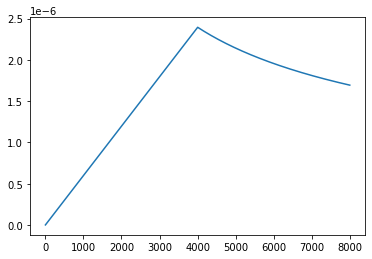

In [58]:
# Learning rate schedule used in "Attention is All You Need"
class LRScheduleAIAYN(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, scale_factor=1, warmup_steps=4000):  # defaults reflect paper's values
        self.warmup_steps = tf.constant(warmup_steps, dtype=tf.float32)
        dim = tf.constant(352, dtype=tf.float32)
        self.scale = scale_factor * tf.math.pow(dim, -1.5)

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        opt_1 = step * tf.math.pow(self.warmup_steps, -1.5)  # linear increase
        opt_2 = tf.math.pow(step, -.5) # decay
        return self.scale * tf.math.reduce_min([opt_1, opt_2])

# visualize learning rate 
temp_lr = LRScheduleAIAYN()
plt.plot([i for i in range(1, 8000)], [temp_lr(i) for i in range(1, 8000)])
print('Learning Rate Schedule')

## Build Model

Model compile options

In [59]:
NAME_MODIFIER = ''

# build model
IMAGE_FEATURES_DIM = 256  # note: only used if USE_DENSE_ENCODER_TOP = True.
                     # use multiple of 8 or 128. Darien Schettler public Kaggle notebook recommends 208
DECODER_UNITS = 256  # use multiple of 8 or 128.  Darien Schettler public Kaggle notebook recommends 208
BEAM_RNN_UNITS = 128  # note: only used in beam_model. use multiple of 8 or 128. 
NUM_ENCODER_BLOCKS = 2  # "All You Need is Attention" uses 6 blocks
NUM_DECODER_BLOCKS = 2  # "All You Need is Attention" uses 6 blocks
USE_DENSE_ENCODER_TOP = True  # for fine tuning the image transfer model 
USE_DUAL_DECODERS = False
USE_CONVOLUTIONS = False
if USE_CONVOLUTIONS:
    checkpoint_save_name = 'ConvAtt_model_weights' + NAME_MODIFIER
else:
    checkpoint_save_name = 'AISAYN_model_weights' + NAME_MODIFIER

LOAD_CHECKPOINT_FILE = os.path.join(PARAMETERS.load_checkpoint_dir(), checkpoint_save_name, checkpoint_save_name)
SAVE_CHECKPOINT_FILE = os.path.join(PARAMETERS.checkpoint_dir(), checkpoint_save_name, checkpoint_save_name)

# note: in Kaggle,
# LOAD_CHECKPOINT_FILE points to saved outputs from prev session
# SAVE_CHECKPOINT_FILE points to saved outputs from current session

Initialize model

In [60]:
# initialize models
for val in train_ds.take(1):
    batch_size=val['image'].shape[0]
    if not PARAMETERS.tpu():
        steps_per_execution = 1
    else:
        steps_per_execution = 32

    with PARAMETERS.strategy().scope():  # ("distribution strategy" defined at top of notebook)
        model_base = BaseTrainer(batch_size=batch_size,
                                 image_features_dim=IMAGE_FEATURES_DIM,
                                 decoder_units=DECODER_UNITS,
                                 num_encoder_blocks=NUM_ENCODER_BLOCKS,
                                 num_decoder_blocks=NUM_DECODER_BLOCKS,
                                 use_dense_encoder_top=USE_DENSE_ENCODER_TOP,
                                 use_convolutions=USE_CONVOLUTIONS,
                                 use_dual_decoder=USE_DUAL_DECODERS,
                                 max_len=176,  # 133 is recommended value from Darien Schettler Kaggle notebook
                                 parameters=PARAMETERS, 
                                 name='BaseTrainer')

        # compiler components
        learning_rate = LRScheduleAIAYN(scale_factor=1, warmup_steps=4000)  # from "Attention is All You Need"
        
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate,  # params from "Attention is All You Need"
                                             beta_1=0.9, beta_2=0.98, epsilon=10e-9)
        checkpoint = tf.keras.callbacks.ModelCheckpoint(SAVE_CHECKPOINT_FILE, monitor='loss', 
                    save_weights_only=True, save_best_only=True, save_freq='epoch')
        
        # optimizations
        if not PARAMETERS.tpu():
            os.environ['TF_GPU_THREAD_MODE'] = 'gpu_private'  # better balances CPU / GPU interaction in tf.data
            tf.config.optimizer.set_jit("autoclustering")  # XLA compiler optimization
            optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)  # required with mixed precision on GPU / CPU

        # custom metrics
        edit_dist_metric = EditDistanceMetric()

        # compile
        model_base.compile(optimizer=optimizer, 
                           loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                           metrics=['sparse_categorical_accuracy', edit_dist_metric],
                           steps_per_execution=steps_per_execution)
        

        
        """ 
        # Beam-update model
        model_beam = InchiGenerator(model_base, beam_rnn_units=BEAM_RNN_UNITS, 
                                    name='InchiGenerator_inference')  
        """

    print('Models initialized.')


# build / verify function call work
# make sure this is NOT within distribution strategy on TPU
if not PARAMETERS.tpu():
    for val in train_ds.take(1):
        model_base(val, training=False)
        model_base(val, training=True)
        model_base.predict(val)

        """
        model_beam(val, training=False)
        model_beam(val, training=True)
        model_beam.predict(val)
        """

        print('\n\n')    
        model_base.summary()

    # sync weights
    # WARNING!: in Kaggle this loads from prev session saved weights
    try:
        with PARAMETERS.strategy().scope(): 
            model_base.load_weights(LOAD_CHECKPOINT_FILE)  
    except:
        print('No weights loaded')  

else:
    model_base(val, training=True)
    print('\n\n')    
    model_base.summary()
    """
    # sync weights
    # WARNING!: in Kaggle this loads from prev session saved weights
    try:
        with PARAMETERS.strategy().scope(): 
            model_base.load_weights(LOAD_CHECKPOINT_FILE)  
    except:
        print('No weights loaded')
    """

Models initialized.



Model: "BaseTrainer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageEncoder (Functional)    (None, 64, 256)           3644320   
_________________________________________________________________
InchiPrep (Functional)       [(None, 175), (None, 176) 0         
_________________________________________________________________
EncoderAttention (Functional (None, 64, 256)           662016    
_________________________________________________________________
DecoderEmbedding (Functional (None, 176, 256)          50944     
_________________________________________________________________
Embedding (Embedding)        (None, 175, 256)          50944     
_________________________________________________________________
DecoderAttention (Functional (None, 176, 256)          1190400   
_________________________________________________________________
DecoderHead_0 (Functional)   (No

In [ ]:
if not PARAMETERS.tpu():
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./logs/')
    %tensorboard --logdir './logs/'

Test inference speed

In [ ]:
# Load inference model (adjusted batch size)
if not PARAMETERS.tpu():
    with PARAMETERS.strategy().scope(): 
        model_inference = BaseTrainer(batch_size=PARAMETERS.inference_batch_size(),
                                  image_features_dim=IMAGE_FEATURES_DIM,
                                  decoder_units=DECODER_UNITS,
                                  num_encoder_blocks=NUM_ENCODER_BLOCKS,
                                  num_decoder_blocks=NUM_DECODER_BLOCKS,
                                  use_dense_encoder_top=USE_DENSE_ENCODER_TOP,
                                  use_convolutions=USE_CONVOLUTIONS,
                                  use_dual_decoder=USE_DUAL_DECODERS,
                                  max_len=176, 
                                  parameters=PARAMETERS, 
                                  name='BaseInference')
    
    # sync weights
    # WARNING!: in Kaggle this loads from prev session saved weights
    try:
        model_inference.load_weights(LOAD_CHECKPOINT_FILE)
        pass
    except:
        print('No weights loaded')

In [ ]:
# test inference speed

num_batches = 3  # processing time for 3 * 256 = 768 images           
%timeit for val2 in train_ds.unbatch().batch(PARAMETERS.inference_batch_size()).take(1): im_id, preds = (model_inference.predict(val2))

In [ ]:
"""
# Full model: inference speed (with beam)
%%timeit
num_batches = 3

for val in train_ds.unbatch().batch(PARAMETERS.inference_batch_size()).take(num_batches): 
    im_id, preds = (model_base.predict(val))
"""

# Training

Train base model

In [ ]:
# Train base model (teacher-fed training, prediction-fed validation, no beam update)

# Note: if training decoders segments, initialize second decoder weights using:
# "model_base.decoder_1.set_weights(model_base.decoder_0.get_weights())"

if not PARAMETERS.tpu():
    steps_per_epoch = 40
    epochs = int(1.6 * 1e6) // (steps_per_epoch * PARAMETERS.batch_size())  # one full pass through train set
else:
    steps_per_epoch = None
    epochs = 4


# train
model_base.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, 
               validation_data=valid_ds, validation_steps=10, validation_freq=6,
               callbacks=[checkpoint, tensorboard], 
               verbose=2, 
               use_multiprocessing=True
               )

Train beam update model

In [ ]:
"""
# train beam model (prediction-fed training and inference, includes beam update mech)

steps_per_epoch = 150
epochs = len(train_labels_df) // steps_per_epoch  # one full pass through the dataset

# sync weights
model_beam.load_weights(PARAMETERS.load_checkpoint_dir() + 'checkpoints')
print('Loaded saved weights')

# choose variables to train
model_base.decoder_0.trainable = True
model_base.decoder_1.trainable = True  # if multiple decoders enabled

# compile
model_beam.compile(optimizer=optimizer, 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy', EditDistanceMetric()])

# train
model_beam.fit(train_ds, epochs=30, steps_per_epoch=20, 
               validation_data=valid_ds, validation_steps=3, validation_freq=5,
               callbacks=[checkpoint],#, tensorboard], 
               verbose=2, use_multiprocessing=True)
"""

# Inference

Here we define function to conduct inference on the test set. Results are saved to "submission.csv".

Intermediate results are saved at regular intervals to. This allows inference to be conducted in stages and is a safeguard in case of interruptions before the full set has been processed. 

In [ ]:
def make_inference_progress(predictions_df, skip_recorded=True, save_freq=50, parameters=PARAMETERS):

    # initialize model and build with inference batch size (test_ds)
    model_base = BaseTrainer(embedding_dim=EMBEDDING_DIM, rnn_units=RNN_DIM, 
                             beam_rnn_units=BEAM_RNN_UNITS, 
                             parameters=PARAMETERS, name='BaseTrainer')
    for val in test_ds.take(1):
        model_base(val)
    model_full = InchiGenerator(model_base, name='InchiGenerator')
    for val in test_ds.take(1):
        model_full(val)

    # load saved weights
    model_full.load_weights(PARAMETERS.load_checkpoint_dir() + 'checkpoints')
    print('Loaded model')

    batch_size = 1024
    if skip_recorded:
        existing_batches = len(predictions_df) // batch_size
    else:
        existing_batches = 0
    i = 0

    for val in test_ds.skip(existing_batches):
        test_im_id, test_pred = model_full.predict(val, return_lev_score=False)

        # decode bytestrings
        test_im_id = [x.decode()[:-4] for x in test_im_id.numpy().tolist()]  # drops '.png'
        test_pred = [x.decode() for x in test_pred.numpy().tolist()]

        new_preds = pd.DataFrame({'image_id': test_im_id, 
                                  'InChI': test_pred})

        
        predictions_df = predictions_df.append(new_preds)

        # save to CSV
        if i % save_freq == 0:
            predictions_df = predictions_df.drop_duplicates(subset='image_id', keep='last')
            predictions_df.to_csv(PARAMETERS.csv_save_dir() + 'submission.csv', index=False)
            print(f'iteration {i}')

        i += 1

    return predictions_df

Load previosuly generated predictions

In [ ]:
try:
    predictions_df = pd.read_csv(PARAMETERS.csv_save_dir() + 'submission.csv')
except:
    predictions_df = pd.DataFrame({'image_id':[], 'InChI':[]}, dtype=str)

Generate additional predictions

In [ ]:
""" On first pass or to start from scratch, initialize the dataframe with:
predictions_df = pd.DataFrame({'image_id':[], 'InChI':[]}, dtype=str)
"""

predictions_df = make_inference_progress(predictions_df, save_freq=100, num_batches=1, starting_batch=0, parameters=PARAMETERS)
predictions_df